In [1]:
import numpy as np
import os
import re
os.chdir("./Desktop/ArticleClassifier")

# Preprocessing the Data

In [2]:
# Run through 70% of the text files from each category (folder)
# 70% Training, 30% Testing for each category
#Creates training_titles and testing_tiles
training_titles_files = []
testing_titles_files = [] 

business_files = os.listdir("./business")
train_business = business_files[0:358]
test_business = business_files[358:] # length = 152 TOTAL = 510 
training_titles_files.append(train_business)
testing_titles_files.append(test_business)

entertainment_files = os.listdir("./entertainment")
train_entertainment = entertainment_files[0:270]
test_entertainment = entertainment_files[270:] # 116 TOTAL = 386
training_titles_files.append(train_entertainment)
testing_titles_files.append(test_entertainment)

politics_files = os.listdir("./politics")
train_politics = politics_files[0:293]
test_politics = politics_files[293:] # 124 # 417
training_titles_files.append(train_politics)
testing_titles_files.append(test_politics)

sport_files = os.listdir("./sport")
train_sport = sport_files[0:359]
test_sport = sport_files[359:] # 152 # 511
training_titles_files.append(train_sport)
testing_titles_files.append(test_sport)

tech_files = os.listdir("./tech")
train_tech = tech_files[0:281]
test_tech = tech_files[281:] # 120 #401
training_titles_files.append(train_tech)
testing_titles_files.append(test_tech)

In [3]:
training_text_file = open("trainingTextFile.txt", "w")

classes = 1
for i in training_titles_files:
	folder_name = ""
	if (classes == 1): 
		folder_name = "business"
	elif (classes == 2):
		folder_name = "entertainment"
	elif (classes == 3):
		folder_name = "politics"
	elif (classes == 4):
		folder_name = "sport"
	elif (classes == 5):
		folder_name = "tech"
	for file_name in i:
		file = "./" + folder_name + "/" + file_name
		#print(file)
		opened = open(file, "r")
		training_text_file.write(opened.readline())
		opened.close()
	classes = classes + 1

training_text_file.close()

masterTestDataFile = open("testTextFile.txt", "w")

classes = 1
for i in testing_titles_files:
	folder_name = ""
	if (classes == 1): 
		folder_name = "business"
	elif (classes == 2):
		folder_name = "entertainment"
	elif (classes == 3):
		folder_name = "politics"
	elif (classes == 4):
		folder_name = "sport"
	elif (classes == 5):
		folder_name = "tech"
	for file_name in i:
		file = "./" + folder_name + "/" + file_name
		#print (file)
		opened = open(file, "r")
		lineRead = opened.readline()
		#try: 
		masterTestDataFile.write(lineRead)
		#except UnicodeDecodeError:
		opened.close()
	classes = classes + 1

masterTestDataFile.close()

#currency stemming nlp

In [4]:
training = []
testing = []

# Puts words in dictionary, key = word, value = index
trfile = open("trainingTextFile.txt", "r")

for line in trfile:
	line = line.replace("'", "")
	new_line = line.split()
	for i in new_line:
		training.append(i)

trfile.close()

words = {}
count = 0
for i in training:
	if i not in words:
		words[i] = count
		count = count + 1

In [35]:
#Create Training Data Matrix
d = len(words) # Number of features (unique words) we have in the dictionary
# print(d)
train_x = []

trfile = open("trainingTextFile.txt", "r")

for line in trfile:
	line = line.replace("'", "")
	word = line.split()
	arr = [0] * d
	for i in word:
		index = words[i]
		arr[index] = arr[index] + 1
	train_x.append(arr)
trfile.close()

In [11]:
#Target Training Vector
train_y = np.zeros((1561, 5))
for i in range(0, 1561):
	if i >= 358 and i < 628:
		train_y[i][1] = 1
	elif i >= 628 and i < 921:
		train_y[i][2] = 1
	elif i >= 921 and i < 1280:
		train_y[i][3] = 1
	elif i >= 1280 and i < 1561:
		train_y[i][4] = 1
	else:
		train_y[i][0] = 1

In [12]:
#Create Testing Data Matrix
test_x = []

testfile = open("testTextFile.txt", "r")

for line in testfile:
	line = line.replace("'", "")
	word = line.split()
	arr = [0] * d
	for i in word:
		if i in words:
			index = words[i]
			arr[index] = arr[index] + 1
	test_x.append(arr)

testfile.close()

In [13]:
#Target Test Vector
test_y = np.zeros((664, 5))
for i in range(152, 664):
	if i >= 152 and i < 268:
		test_y[i][1] = 1
	elif i >= 268 and i < 392:
		test_y[i][2] = 1
	elif i >= 392 and i < 544:
		test_y[i][3] = 1
	elif i >= 544 and i < 664:
		test_y[i][4] = 1
	else:
		test_y[i][0] = 1

# countzero = 0
# countone = 0
# counttwo = 0
# countthree = 0
# countfour = 0
# for i in test_y:
# 	if i == 0:
# 		countzero+=1
# 	if i == 1:
# 		countone += 1
# 	if i == 2:
# 		counttwo+=1 
# 	if i == 3:
# 		countthree+=1
# 	if i == 4:
# 		countfour +=1

#print(countzero)
#print(countone)
#print(counttwo)
#print(countthree)
#print(countfour)


# y = 0 --> Business
# y = 1 --> Entertainment
# y = 2 --> Politics
# y = 3 --> Sport
# y = 4 --> Tech

# Creating LossHistory Class

In [40]:
# Got from keras.io
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.train_accuracy = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('val_loss'))
        self.train_accuracy.append(logs.get('acc'))
        self.test_accuracy.append(logs.get('val_acc'))

history = LossHistory()

# Neural Networks with varying number of hidden layers


In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import keras

In [42]:
# epoch how many big loops
# batch = how many times each loop

keras.backend.clear_session()

train_y = np.array(train_y)
train_x = np.array(train_x)
test_x = np.array(test_x)
test_y = np.array(test_y)

# First model (smallest hidden layers (2))
model_one = Sequential()

model_one.add(Dense(units = d, input_shape = train_x[0].shape))

model_one.add(Dense(units = 500, activation = 'relu'))
model_one.add(Dense(units = 500, activation = 'relu'))

model_one.add(Dense(units = 5, activation = 'softmax'))

model_one.summary()

opt = optimizers.Adam(lr=0.01)
model_one.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_one.fit(train_x, train_y, batch_size = 200, epochs = 10, validation_data = (test_x, test_y), callbacks = [history])

#epochs=20, batch_size=42, validation_data=(X_ts, Y_ts), callbacks=[history_cb])
#model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3454)              11933570  
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1727500   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 2505      
Total params: 13,914,075
Trainable params: 13,914,075
Non-trainable params: 0
_________________________________________________________________
Train on 1561 samples, validate on 664 samples
Epoch 1/10
1561/1561 [==============================] - 3s 2ms/step - loss: 1.5421 - acc: 0.4600 - val_loss: 0.8632 - val_acc: 0.6777
Epoch 2/10
1561/1561 [==============================] - 2s 1ms/step - loss: 0.208

In [23]:
# Second model (Medium hidden layers (4))
model_two = Sequential()

model_two.add(Dense(units = d, input_shape = train_x[0].shape))

model_two.add(Dense(units = 500, activation = 'relu'))
model_two.add(Dense(units = 500, activation = 'relu'))
model_two.add(Dense(units = 500, activation = 'relu'))
model_two.add(Dense(units = 500, activation = 'relu'))

model_two.add(Dense(units = 5, activation = 'softmax'))

opt = optimizers.Adam(lr=0.01)
model_two.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_two.summary()

model_two.fit(train_x, train_y, batch_size = 200, epochs = 10, validation_data = (test_x, test_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 3454)              11933570  
_________________________________________________________________
dense_51 (Dense)             (None, 500)               1727500   
_________________________________________________________________
dense_52 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_53 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_54 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_55 (Dense)             (None, 5)                 2505      
Total params: 14,415,075
Trainable params: 14,415,075
Non-trainable params: 0
________________________________________________________________

In [22]:
# Third model (Large hidden layers (6))
model_three = Sequential()

model_three.add(Dense(units = d, input_shape = train_x[0].shape))

model_three.add(Dense(units = 500, activation = 'relu'))
model_three.add(Dense(units = 500, activation = 'relu'))
model_three.add(Dense(units = 500, activation = 'relu'))
model_three.add(Dense(units = 500, activation = 'relu'))
model_three.add(Dense(units = 500, activation = 'relu'))
model_three.add(Dense(units = 500, activation = 'relu'))

model_three.add(Dense(units = 5, activation = 'softmax'))

model_three.summary()

opt = optimizers.Adam(lr=0.01)
model_three.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_three.fit(train_x, train_y, batch_size = 200, epochs = 10, validation_data = (test_x, test_y))

#We think this has lower accuracy bc of overfitting

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 3454)              11933570  
_________________________________________________________________
dense_43 (Dense)             (None, 500)               1727500   
_________________________________________________________________
dense_44 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_45 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_46 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_47 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_48 (Dense)             (None, 500)               250500    
__________

# Neural Networks (Second Model) with varying activation functions

In [25]:
# Second model (Medium hidden layers (4))
model_two = Sequential()

model_two.add(Dense(units = d, input_shape = train_x[0].shape))

model_two.add(Dense(units = 500, activation = 'sigmoid'))
model_two.add(Dense(units = 500, activation = 'sigmoid'))
model_two.add(Dense(units = 500, activation = 'sigmoid'))
model_two.add(Dense(units = 500, activation = 'sigmoid'))

model_two.add(Dense(units = 5, activation = 'softmax'))

opt = optimizers.Adam(lr=0.01)
model_two.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_two.summary()

model_two.fit(train_x, train_y, batch_size = 200, epochs = 10, validation_data = (test_x, test_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3454)              11933570  
_________________________________________________________________
dense_6 (Dense)              (None, 500)               1727500   
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 2505      
Total params: 14,415,075
Trainable params: 14,415,075
Non-trainable params: 0
________________________________________________________________

In [29]:
# Second model (Medium hidden layers (4))
model_two = Sequential()

model_two.add(Dense(units = d, input_shape = train_x[0].shape))

model_two.add(Dense(units = 500, activation = 'tanh'))
model_two.add(Dense(units = 500, activation = 'tanh'))
model_two.add(Dense(units = 500, activation = 'tanh'))
model_two.add(Dense(units = 500, activation = 'tanh'))

model_two.add(Dense(units = 5, activation = 'softmax'))

opt = optimizers.Adam(lr=0.01)
model_two.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_two.summary()

model_two.fit(train_x, train_y, batch_size = 200, epochs = 10, validation_data = (test_x, test_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 3454)              11933570  
_________________________________________________________________
dense_30 (Dense)             (None, 500)               1727500   
_________________________________________________________________
dense_31 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_32 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_33 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 2505      
Total params: 14,415,075
Trainable params: 14,415,075
Non-trainable params: 0
________________________________________________________________

# Neural Networks (Second Model) with varying number of hidden nodes

In [33]:
# Second model (Medium hidden layers (4))
model_two = Sequential()

model_two.add(Dense(units = d, input_shape = train_x[0].shape))

model_two.add(Dense(units = 1000, activation = 'relu'))
model_two.add(Dense(units = 500, activation = 'relu'))
model_two.add(Dense(units = 250, activation = 'relu'))
model_two.add(Dense(units = 125, activation = 'relu'))

model_two.add(Dense(units = 5, activation = 'softmax'))

opt = optimizers.Adam(lr=0.01)
model_two.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_two.summary()

model_two.fit(train_x, train_y, batch_size = 200, epochs = 10, validation_data = (test_x, test_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 3454)              11933570  
_________________________________________________________________
dense_54 (Dense)             (None, 1000)              3455000   
_________________________________________________________________
dense_55 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_56 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_57 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_58 (Dense)             (None, 5)                 630       
Total params: 16,046,325
Trainable params: 16,046,325
Non-trainable params: 0
________________________________________________________________

In [32]:
# Second model (Medium hidden layers (4))
model_two = Sequential()

model_two.add(Dense(units = d, input_shape = train_x[0].shape))

model_two.add(Dense(units = 2000, activation = 'relu'))
model_two.add(Dense(units = 1000, activation = 'relu'))
model_two.add(Dense(units = 500, activation = 'relu'))
model_two.add(Dense(units = 250, activation = 'relu'))

model_two.add(Dense(units = 5, activation = 'softmax'))

opt = optimizers.Adam(lr=0.01)
model_two.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_two.summary()

model_two.fit(train_x, train_y, batch_size = 200, epochs = 10, validation_data = (test_x, test_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 3454)              11933570  
_________________________________________________________________
dense_48 (Dense)             (None, 2000)              6910000   
_________________________________________________________________
dense_49 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_50 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_51 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_52 (Dense)             (None, 5)                 1255      
Total params: 21,471,575
Trainable params: 21,471,575
Non-trainable params: 0
________________________________________________________________

# Graphing the NN Datas

In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

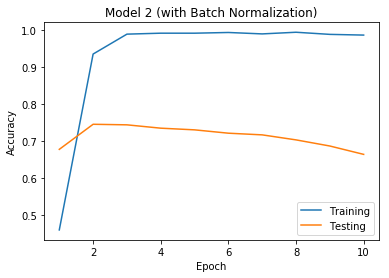

In [45]:
x_range = np.arange(1, 11, 1)
plt.plot(x_range, history.train_accuracy)
plt.plot(x_range, history.test_accuracy)
plt.title('Model 2 (with Batch Normalization)')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')